### Topics to be discussed.
- Mean, Median, Mode and their relationship ==> Skewed Right, symmetric, Skewed Left
- Range, verience, standard deviation
- Normal distribution and standard deviation (1 standard deviation of the mean- 68%, 2 standard deviation 95%, 3 standard deviation 99.7%...)
- Z-score (standard deviation 1, mean = 0, z-score= number of sd)
- Inter quatile range.
- Statistical testing (t-test, one way, two way)
- Correlation
- Hypotheis testing

### **Problem 1: Mean, Median, Mode**
A retail company wants to analyze the sales data of its top-selling product over the past year to gain insights into customer purchasing behavior. The company has collected daily sales data for this product and wants to understand the central tendency of sales figures. By calculating the mean, median, and mode of the sales data, the company aims to identify patterns, understand typical sales volumes, and detect any skewness or anomalies in the sales distribution. Generate the daily sales data for a year by yourself. Analyze the result.
- use daily_sales.csv

In [72]:
import pandas as pd

daily_sales_df = pd.read_csv('daily_sales.csv')
daily_sales_df.head()

,Daily Sales
0,23
1,15
2,21
3,25
4,15


In [96]:
frequency = daily_sales_df['Daily Sales'].value_counts()
frequency

Daily Sales
22    34
18    32
21    31
17    30
19    28
20    28
14    21
24    21
15    21
23    20
16    19
25    14
13    13
27    12
26     9
29     6
12     6
28     5
30     4
10     3
11     3
32     2
9      2
7      1
Name: count, dtype: int64

In [73]:
mean = daily_sales_df['Daily Sales'].mean()
mode = daily_sales_df['Daily Sales'].mode()
median = daily_sales_df['Daily Sales'].median()

print('YEARLY \n Mean: {} \n Mode: {} \n Median: {}'.format(mean, mode[0], median))

YEARLY 
 Mean: 19.695890410958903 
 Mode: 22 
 Median: 20.0


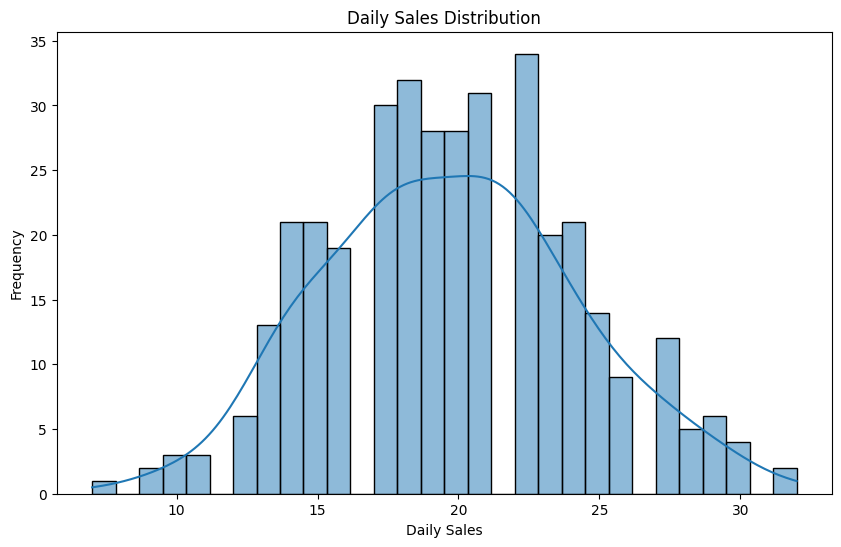

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(daily_sales_df['Daily Sales'], bins=30, kde=True)

plt.title('Daily Sales Distribution')
plt.xlabel('Daily Sales')
plt.ylabel('Frequency')
plt.show()

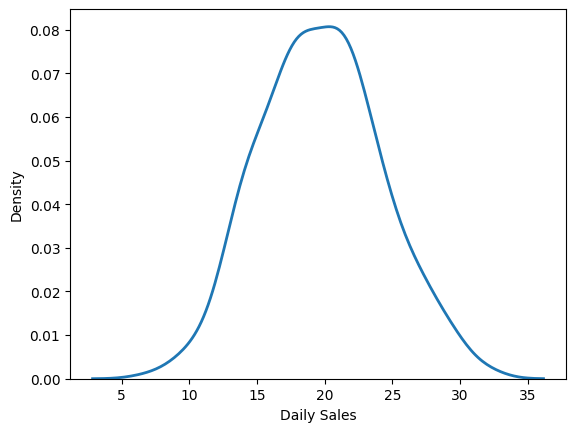

In [108]:
sns.kdeplot(daily_sales_df['Daily Sales'], linewidth=2)

plt.show()

Skewness


In [110]:
data_skewness = daily_sales_df['Daily Sales'].skew()
data_kurtosis = daily_sales_df['Daily Sales'].kurt()
print('Skewness: {} and Kurtosis: {}'.format(data_skewness, data_kurtosis))

Skewness: 0.12355217083633661 and Kurtosis: -0.24443013754913556


---
**Kurtosis** is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. It tells us how much of the variance in the data is due to extreme devistions (outliers) as opposed to moderate deviations.  
- (Normal Distribution ) Mesokurtic: value close to zero indicates a distribution with tails similar to the normal distribution. Standard Normal Distribution has a kurtosis of 3. However, in practice, when calculating excess kurtosis, this value is often adjusted to 0 to compare against a normal distribution.  
- (Heavy Tails ) Leptokurtic: A positive kurtosis value indicates a distribution with heavier tails than a normal distribution (leptokurtic). This means the distribution has more extreme outliers.  
- (Light Tails) Platykurtic: A negative kurtosis value indicates a distribution with lighter tails than a normal distribution (platykurtic). This means the distribution has fewer extreme outliers.  

**Skewness** is the measure of asymmetry of the propability distribution of a real-valued random variable about its mean. 
- Positive Skewness: Tail on the right side of the distribution is longer or flatter than the left side | majority of the data points are concentrated on the left of the mean.
- Negative Skewness: Tail on the left side of the distribution is longer or fatter than the right side | majority of the data points are concentrated on the right of the mean.
- Zero Skewness:  Tails on both sides of the mean are balanced, and the distribution is symmetrical. A skewness value between -0.5 and 0.5 generally indicates a fairly symmetrical distribution.

The **Daily Sales** Data is fairly symmetrical and slightly Platykurtic, indicating a distribution that is close to a normal distribution in terms of symmetry but with slightly fewer outliers than a normal distribution would have.

---

### **Problem 2: Data distribution and plots**
You are tasked with analyzing the average monthly sales data of a retail store chain over the past year to determine if there has been a significant change in sales compared to the previous year. This analysis will help the store management understand the performance trends and plan future strategies accordingly. Load sales_data.csv.
- find mean sales
- find median sales
- find mode sales
- find skewness
- plot histogram
- density plot

In [75]:
sales = pd.read_csv('sales_data.csv')
sales.head()

,Month,Sales
0,2023-01-31,15292.157038
1,2023-02-28,11200.471625
2,2023-03-31,12936.213952
3,2023-04-30,16722.679598
4,2023-05-31,15602.673970


In [76]:
mean_sales = sales['Sales'].mean()
median_sales = sales['Sales'].median()
mode_sales = sales['Sales'].mode()

print('MONTHLY \n Mean: {} \n Median: {} \n Mode: {} '.format(mean_sales, median_sales ,mode_sales))

MONTHLY 
 Mean: 12244.63719635305 
 Median: 12041.030379195941 
 Mode: 0      7068.166360
1      9545.928375
2      9690.343445
3     10432.130713
4     11200.471625
5     11231.795506
6     12850.265253
7     12936.213952
8     14362.820521
9     15292.157038
10    15602.673970
11    16722.679598
Name: Sales, dtype: float64 


---
Since all the values in sales data are unique, each value has maximum frequency as 1. As a result the mode function returns all the values because they have the same frequency of 1.  
Also, the mode is particularly useful for categorical data, where we wish to know which is the most common category

---

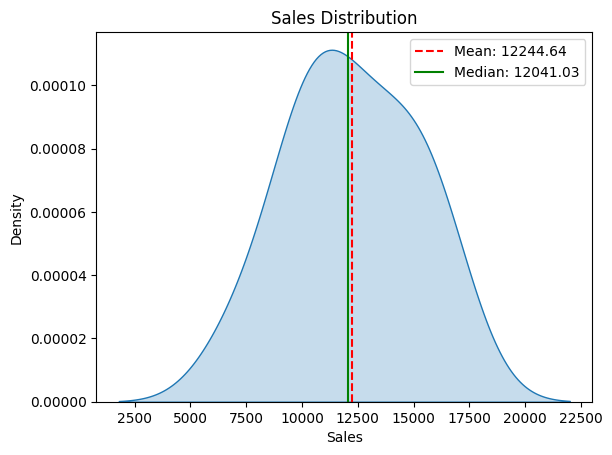

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(sales['Sales'], fill=True)
plt.title('Sales Distribution')

plt.axvline(mean_sales, color='r', linestyle='--', label=f'Mean: {mean_sales:.2f}')
plt.axvline(median_sales, color='g', linestyle='-', label=f'Median: {median_sales:.2f}')

plt.legend()
plt.show()

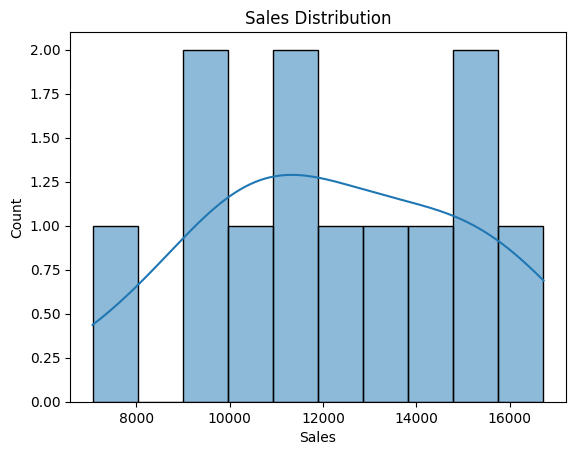

In [114]:
sns.histplot(sales['Sales'], bins=10, kde=True)
plt.title('Sales Distribution')
plt.show()

In [115]:
sales_skewness = sales['Sales'].skew()
print('Skewness: {}'.format(sales_skewness))

Skewness: -0.07734448027250686


---
The Sales data distribution is almost symmetrical indicating that the sales performance has been relatively stable over the period ( **consistent** ). The mean, median values of the sales data are close to eachother, and there is no significant skewness affecting the distribution.

---

### **Problem 3: Outlier detection**
A university wants to analyze the exam scores of a statistics class to identify any students whose scores are significantly different from the rest. Detecting outliers will help the university provide additional support to struggling students or recognize exceptionally high performers. The university decides to use both the Z-score and the Interquartile Range (IQR) methods to identify these outliers in the exam scores dataset. 
- Generate the subject score for full mark 100 for 50 students.

Hints:
- Z-score is greater than 3.
- below - Q1−1.5×IQR or above Q3+1.5×IQR

In [116]:
import random
import numpy as np

lambda_param = 70

student_scores = np.random.poisson(lambda_param, 1000)

student_scores_df = pd.DataFrame({'Scores': student_scores})
student_scores_df.head()

,Scores
0,77
1,70
2,69
3,56
4,66


<Axes: xlabel='Scores', ylabel='Count'>

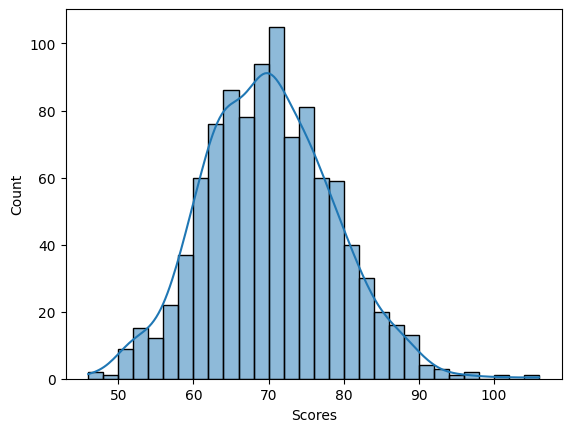

In [117]:
sns.histplot(student_scores_df['Scores'], bins=30, kde=True)

In [118]:
mean = student_scores_df['Scores'].mean()
std_dev = student_scores_df['Scores'].std()


def z_score(x):
    return (x - mean) / std_dev

student_scores_df['Z-Score'] = student_scores_df['Scores'].apply(z_score)
student_scores_df.head()

,Scores,Z-Score
0,77,0.825088
1,70,0.007707
2,69,-0.109062
3,56,-1.627056
4,66,-0.459368


In [82]:
# outliers
outliers = student_scores_df[student_scores_df['Z-Score'].abs() > 3]
outliers

,Scores,Z-Score
509,43,-3.202315
1279,107,4.381448
1553,98,3.314981
2182,44,-3.083819
2702,96,3.077989
2993,38,-3.794796
3193,99,3.433477
3198,101,3.670470
3248,99,3.433477
3529,96,3.077989


In [119]:
Q1 = student_scores_df['Scores'].quantile(0.25)
Q3 = student_scores_df['Scores'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = student_scores_df[(student_scores_df['Scores'] < lower_bound) | (student_scores_df['Scores'] > upper_bound)]
outliers

,Scores,Z-Score
173,101,3.627538
355,94,2.810157
385,96,3.043694
534,47,-2.677975
865,46,-2.794743
890,97,3.160463
917,106,4.211382


In [120]:
scores_skewness = student_scores_df['Scores'].skew()
scores_kurtosis = student_scores_df['Scores'].kurt()
print('Skewness: {} and Kurtosis: {}'.format(scores_skewness, scores_kurtosis))

Skewness: 0.23745804631666875 and Kurtosis: 0.1996491489190615


---
The Students Score data is fairly normally distributed, with a slight skew to the right and tails that are neither heavy or light. However, there is larger number of outliers detected by the z-score but only a few were detected by IOQ Method which might be because z-score assumes normal distribution and calculates outliers based on the standard deviation from the mean. So, Slight skewness in the data might have lead to different outliers identification as mean and standard deviation are affected by skewness. On the other hand, IOR relies on quartiles, which are less sensitive to slight deviations from normality and skewness, making it robust against distribution that are not perfectly normal.

---

### **Problem 4: t-test for ML models**
Your task is to write Python code to perform t-tests on the testing results of five different machine learning algorithms. First, generate testing results for each of the five models, with each model having results for 50 test sets. Then, using these generated results, conduct t-tests to compare the results of the first model with those of each of the remaining four models. The goal is to determine if there is a statistically significant difference between the performance of the first model and each of the other models. Finally, print the results of each t-test, which will include the t-statistic and p-value for each comparison. And analyze the result whether the methods are statistically significant or not. What does it mean?

In [125]:
import scipy.stats as stats

means = [0.8, 0.82, 0.78, 0.31, 0.89]  # Example mean accuracies for 5 models
std_devs = [0.02, 0.02, 0.01, 0.02, 0.02]  # Example standard deviations for 5 models
results = [np.random.normal(mean, std, 50) for mean, std in zip(means, std_devs)]

for i in range(1, 5):
    t_stat, p_value = stats.ttest_ind(results[0], results[i])
    print(f"Model 1 vs Model {i+1}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

    # Step 3: Analyze results
    if p_value < 0.05:
        print(f" - Statistically significant difference between Model 1 and Model {i+1}.\n")
    else:
        print(f" - No statistically significant difference between Model 1 and Model {i+1}.\n")


Model 1 vs Model 2: t-statistic = -4.651, p-value = 0.000
 - Statistically significant difference between Model 1 and Model 2.

Model 1 vs Model 3: t-statistic = 5.479, p-value = 0.000
 - Statistically significant difference between Model 1 and Model 3.

Model 1 vs Model 4: t-statistic = 135.177, p-value = 0.000
 - Statistically significant difference between Model 1 and Model 4.

Model 1 vs Model 5: t-statistic = -25.905, p-value = 0.000
 - Statistically significant difference between Model 1 and Model 5.



---

### **Problem 5: Correlation Analysis**
- A coffee shop owner wants to determine whether there is a relationship between the amount of coffee sold and the temperature outside. The owner collects data on the number of cups of coffee sold and the temperature outside for 20 days.
- Download mtcars.csv file and perform the correlation analysis. See the result and analyze it. Also plot the heatmap for it.

In [84]:
temperature_data = [random.randint(20, 35) for _ in range(20)]
amount_sold = [random.randint(100, 200) for _ in range(20)]

temp_sold = pd.DataFrame({'Temperature': temperature_data, 'Amount Sold': amount_sold})
temp_sold.head()

,Temperature,Amount Sold
0,20,168
1,27,180
2,30,168
3,32,190
4,22,189


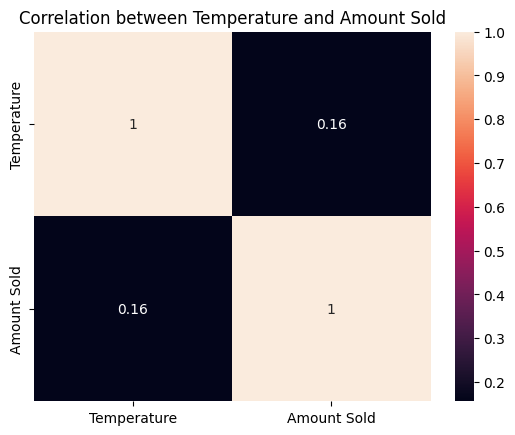

In [85]:
temp_sold_corr = temp_sold.corr()

sns.heatmap(temp_sold_corr, annot=True)
plt.title('Correlation between Temperature and Amount Sold')
plt.show()

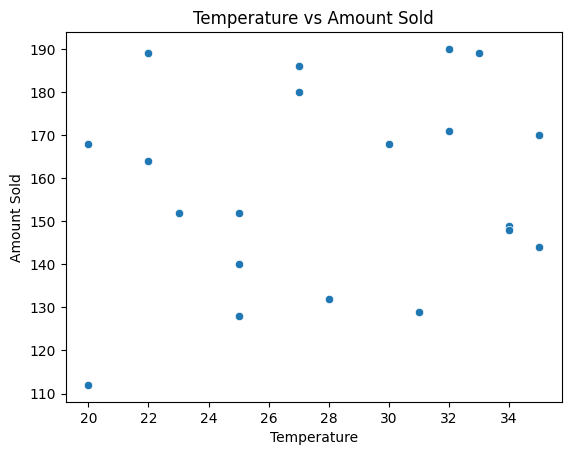

In [86]:
sns.scatterplot(x='Temperature', y='Amount Sold', data=temp_sold)
plt.title('Temperature vs Amount Sold')
plt.show()

In [87]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [88]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [89]:
no_model = mtcars.drop('model', axis=1)
no_model.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


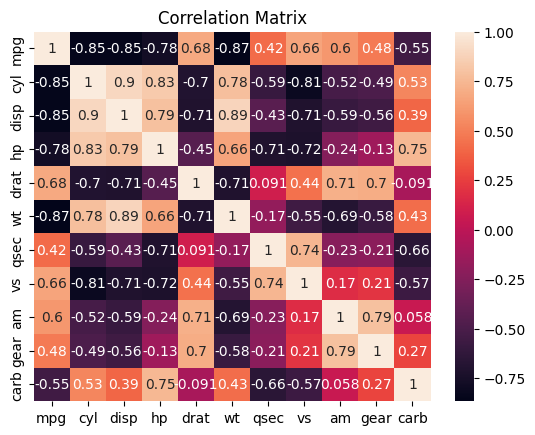

In [90]:
mtcars_corr = no_model.corr()

sns.heatmap(mtcars_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

--- 
The correlation of 1 indicates a perfect positive relationship between two variables.  
The correlation of -1 indicates a perfect negative relationship between two variables.  
The correlation of 0 means there is no linear relationship between the two variables.

Hence, There seems to be high positive correlation between cyl and disp, disp and wt, hp and carb. similarly, cyl and mpg has highest negative correlation and (dart, qsec) seems to have no linear relationship.

---

### **Problem 6: Hypothesis testing**
Imagine a company, samsung, that manufactures a popular smartphone. They have introduced a new battery designed to last longer than the previous model, which had an average battery life of 10 hours. To determine if the new battery indeed lasts longer, samsung conducts a study where they test 30 smartphones with the new battery and record their battery life. The goal is to test the hypothesis that the mean battery life of the new batteries is greater than 10 hours using a one-tailed test.

Hypothesis:
- Null Hypothesis (H₀): The mean battery life of the new battery is 10 hours.
- Alternative Hypothesis (H₁): The mean battery life of the new battery is greater than 10 hours.

In [91]:
import scipy.stats as stats

battery_life = np.array([10.5, 11, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 11, 9, 1, 8, 7, 6, 5, 4, 3, 2, 1])

sample_mean = np.mean(battery_life)
sample_std_dev = np.std(battery_life)
n = len(battery_life)
mu_0 = 10

t_statistic = (sample_mean - mu_0) / (sample_std_dev / np.sqrt(n))

p_value = stats.t.sf(t_statistic, n-1)

print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


T-Statistic: 1.5991572457333283
P-Value: 0.06031273270160324
Fail to reject the null hypothesis


---
Hence, based on the Hypothesis testing on the sample, it can be concluded that the mean battery life of the new battery is greater than 10 hours.

---

## Summarizing categorical variables

1. Frequency table
	1. Value count of blood type
	2. Value count of gender
	3. Value count as proportions
2. Contengency table
	1. Cross table of bloodtype and gender
	2. explore margins

## Interval Estimation of the Proportion

```
HINT: explore st.norm.interval
```

1.  There are two candidates for the election: A and B.
The candidate A wants to survey his approval rating.
Out of 100 suerveyed, 55 answered positively.
Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.



2. Out of 1000 suerveyed, 550 answered positively. Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.

```


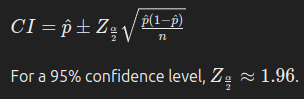

In [126]:
sample_proportion = (55/100)
n = 100
confidence_level = 0.95

z_critical = stats.norm.ppf(confidence_level + (1 - confidence_level) / 2)

margin_of_error = z_critical * np.sqrt((sample_proportion * (1 - sample_proportion)) / n)

confidence_interval = (sample_proportion - margin_of_error, sample_proportion + margin_of_error)

print('Confidence Interval:', confidence_interval)

Confidence Interval: (0.45249302291006066, 0.6475069770899394)


---
The 95% confidence interval is approximately (0.4525, 0.6475). Since this interval includes values less than 0.50, candidate A cannot be sure of winning based on this survey.

---

In [127]:
sample_proportion = 550 / 1000
n = 1000
confidence_level = 0.95

z_critical = stats.norm.ppf(confidence_level + (1 - confidence_level) / 2)

margin_of_error = z_critical * np.sqrt((sample_proportion * (1 - sample_proportion)) / n)

confidence_interval = (sample_proportion - margin_of_error, sample_proportion + margin_of_error)

print('Confidence Interval:', confidence_interval)

Confidence Interval: (0.5191655864637935, 0.5808344135362066)


---
The 95% confidence interval is approximately (0.5191, 0.5809). Since this interval is entirely above 0.50, candidate A can be more confident about winning based on this survey.

---

### How can we know that the three groups are same or different?

- There are three groups of students. The data corresponds to the test scores. Determine whether there is any significant difference in the group test scores.
```python
# Data
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])

In [128]:
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])

# Using ANOVA
f_value, p_value = stats.f_oneway(x1, x2, x3)

print('F-Statistic: {}, P-Value: {}'.format(f_value, p_value))

alpha = 0.05
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

F-Statistic: 0.2837261275904103, P-Value: 0.7562784116739912
There is no significant difference between the groups.


---
We fail to reject the null Hypothesis i.e. There is no significant difference between the groups.

---